# INTRODUCTION

Melbourne Housing Project
Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guideline as:
1. Examine and explore data (visualization, interactions among features)
2. Apply the model for prediction with holdout and cross validation
3. Using PCA, apply the model with holdout and cross validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)
7. Include conclusions for summary

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")
import os

In [216]:
PathFile = os.getcwd()+'\Melbourne_housing_FULL.csv'

In [217]:
data = pd.read_csv(PathFile)

1. Examine and explore data

In [218]:
pd.set_option('display.max_columns', None) # display all columns
print(data.head(10))

       Suburb             Address  Rooms Type      Price Method  SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
5  Abbotsford    40 Federation La      3    h   850000.0     PI   Biggin   
6  Abbotsford         55a Park St      4    h  1600000.0     VB   Nelson   
7  Abbotsford        16 Maugie St      4    h        NaN     SN   Nelson   
8  Abbotsford        53 Turner St      2    h        NaN      S   Biggin   
9  Abbotsford        99 Turner St      2    h        NaN      S  Collins   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  3/12/2016       2.

In [219]:
print(data.keys())

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [220]:
print(data.shape)

(34857, 21)


Mẫu dữ liệu có 34857 rows và 21 columns

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

Dựa trên tập dữ liệu. Phát hiện thấy tập dữ liệu không tốt.
Vì khi lấy mẫu có quá nhiều giá trị Null trên nhiều hạng mục khác nhau.
Tiếp theo sẽ kiểm chứng thử việc loại bỏ giá trị Null

In [222]:
data2 = data[data.Suburb.notnull()]
data2  = data2[data2.Address.notnull()]
data2  = data2[data2.Rooms.notnull()]
data2  = data2[data2.Type.notnull()]
data2  = data2[data2.Price.notnull()]
data2  = data2[data2.Method.notnull()]
data2  = data2[data2.SellerG.notnull()]
data2  = data2[data2.Date.notnull()]
data2  = data2[data2.Distance.notnull()]
data2  = data2[data2.Postcode.notnull()]
data2  = data2[data2.Bedroom2.notnull()]
data2  = data2[data2.Bathroom.notnull()]
data2  = data2[data2.Car.notnull()]
data2  = data2[data2.Landsize.notnull()]
data2  = data2[data2.BuildingArea.notnull()]
data2  = data2[data2.YearBuilt.notnull()]
data2  = data2[data2.CouncilArea.notnull()]
data2  = data2[data2.Lattitude.notnull()]
data2  = data2[data2.Longtitude.notnull()]
data2  = data2[data2.Regionname.notnull()]
data2  = data2[data2.Propertycount.notnull()]
data2 .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [223]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Postcode,8887.0,3.111663e+03,112.614268,3000.00000,3044.00000,3084.0000,3.150000e+03,3.977000e+03
Bedroom2,8887.0,3.078204e+00,0.966269,0.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03


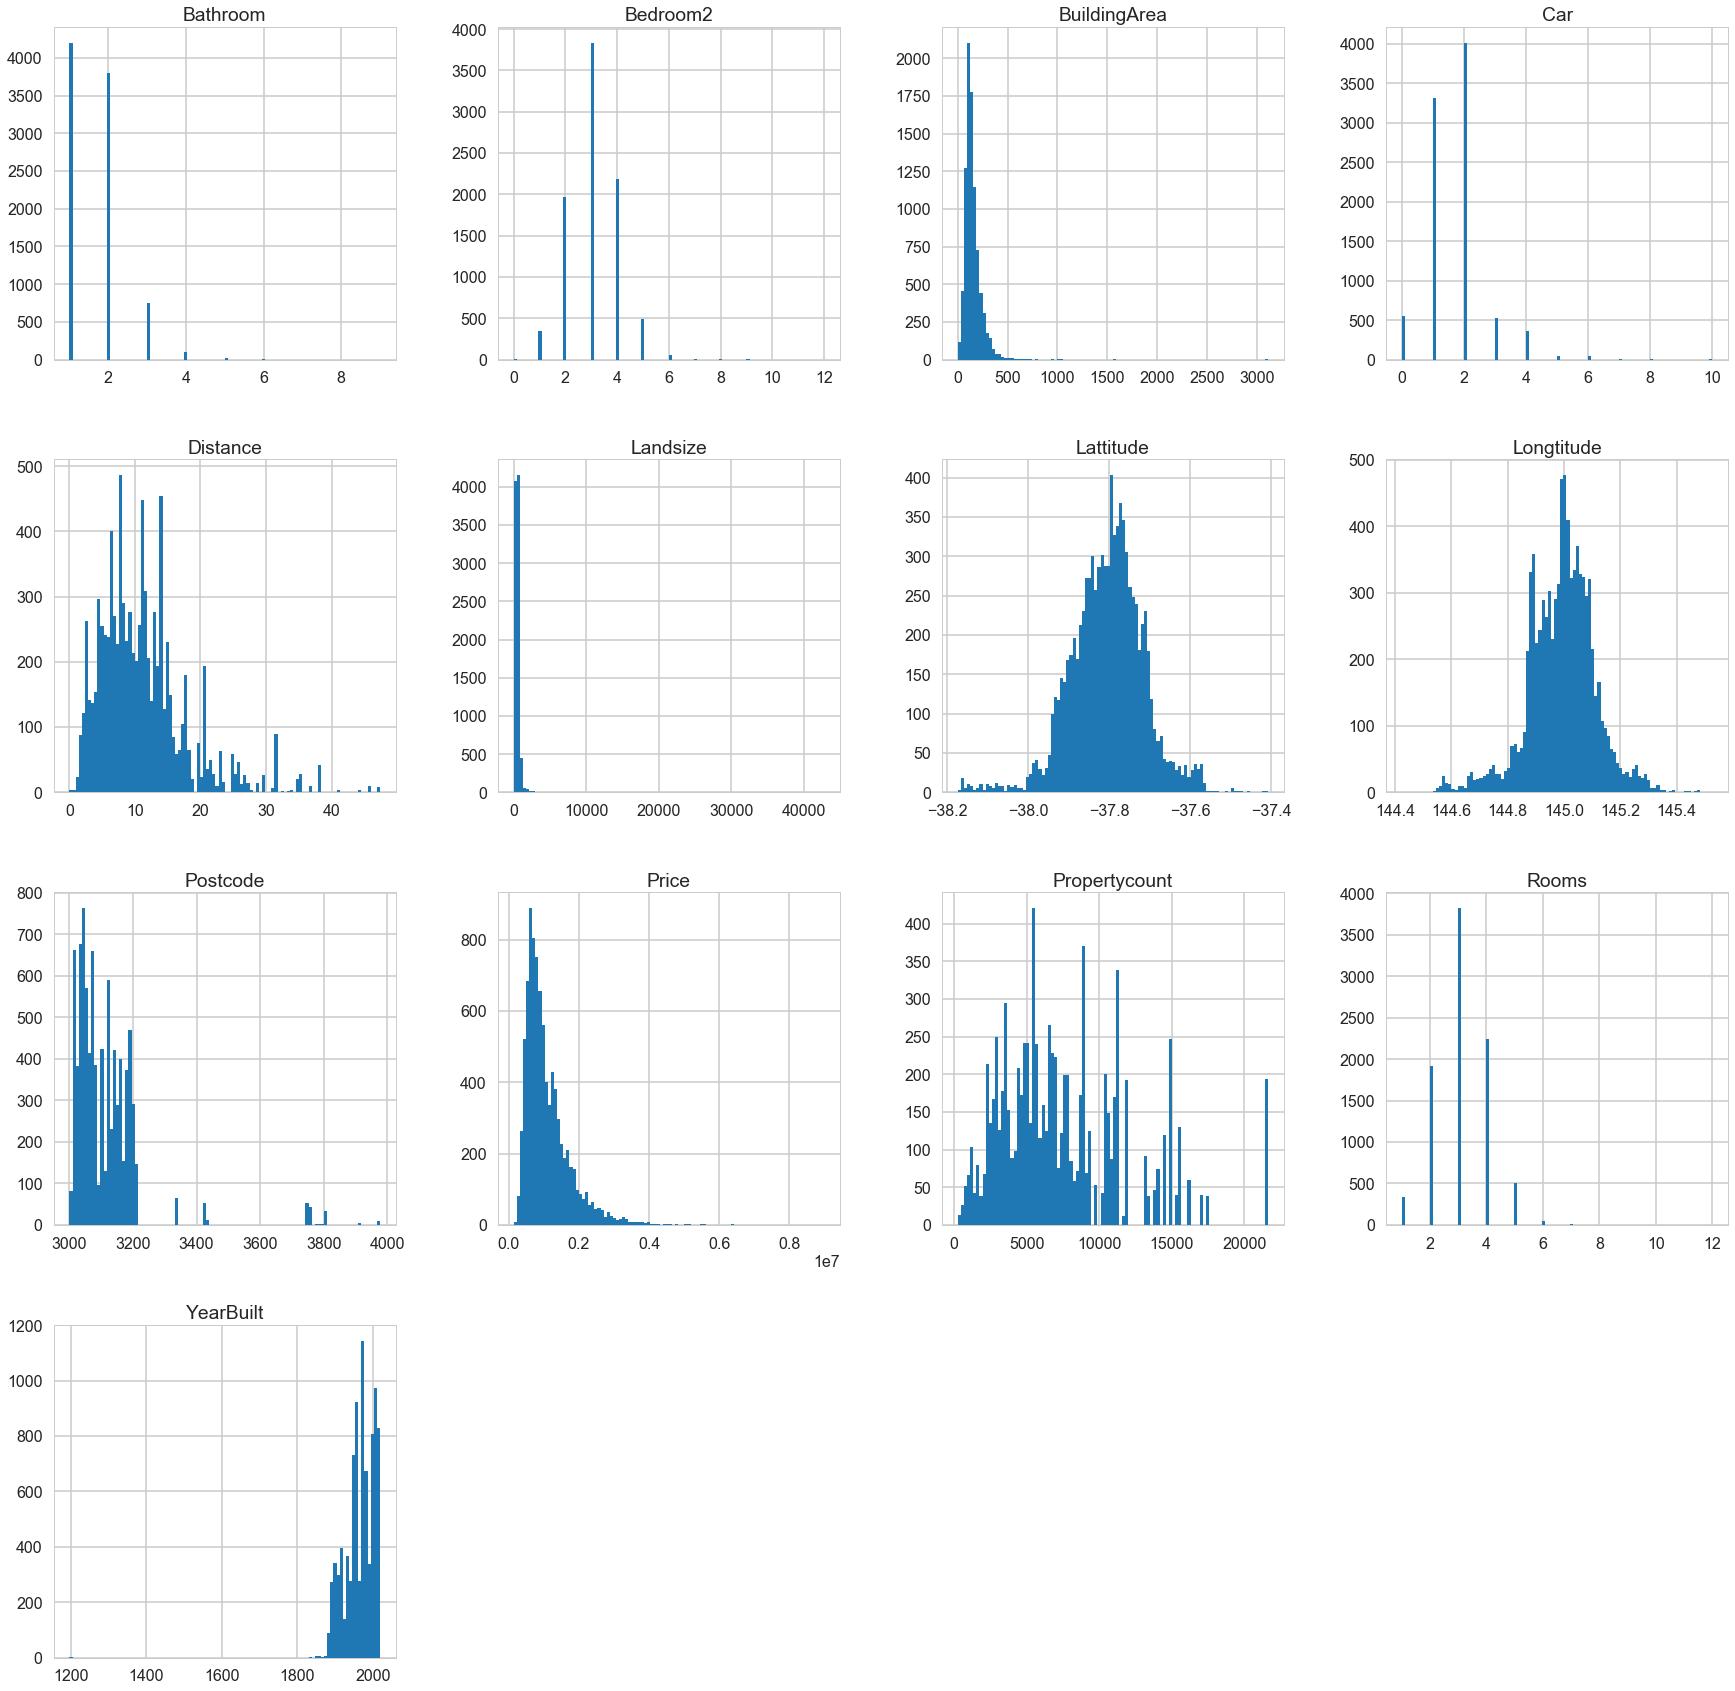

In [224]:
plt.rcParams['figure.figsize'] = 30, 30
data2.loc[:,:].hist(bins=100)
plt.show()

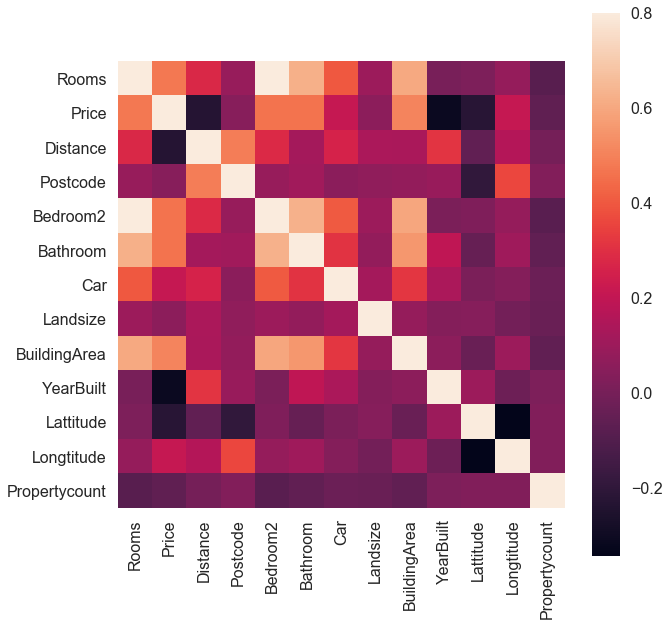

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.475074,0.276585,0.084236,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016,-0.082797
Price,0.475074,1.000000,-0.231212,0.046033,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174,-0.059720
Distance,0.276585,-0.231212,1.000000,0.489537,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941,-0.003247
Postcode,0.084236,0.046033,0.489537,1.000000,0.087286,0.111617,0.055531,0.069623,0.077091,0.089913,-0.195081,0.358005,0.032758
Bedroom2,0.964465,0.460880,0.283460,0.087286,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671,-0.081392
Bathroom,0.624070,0.463501,0.122132,0.111617,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268,-0.058324
Car,0.401423,0.209464,0.259374,0.055531,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589,-0.031285
Landsize,0.101158,0.058375,0.138559,0.069623,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196,-0.032548
BuildingArea,0.606738,0.507284,0.135509,0.077091,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635,-0.059024
YearBuilt,0.006935,-0.313664,0.313383,0.089913,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886,0.017224


In [225]:
f, ax = plt.subplots(figsize=(10, 10))
corrmat = data2.corr()
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()
corrmat

Price tương quan cao Rooms, Bedroom2, Bathroom, BuildingArea.
Price tương quan nghịch Distance, YearBuit, Lattitude.
Price tương quan thấp Propertycount, Postcode, Landsize.

Dựa vào kết quả cho ta thấy dữ liệu sãy ra trường hợp đa công tuyến (Muticollinearty)
Rooms tương quan rất cao với Bedroom2 và tương quan cao Bathroom, BuildingArea.
BuildingArea tương quan cao Rooms, Bedroom2, Bathroom.


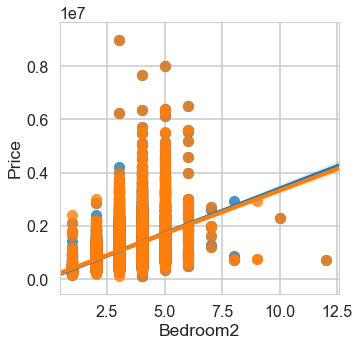

In [226]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=data2['Rooms'], y=data2['Price'])
sns.regplot(x=data2['Bedroom2'], y=data2['Price'])
plt.show()

Dự vào đồ thị ta chỉ cần lấy 1 dữ liệu Rooms để sét quan hệ với Price

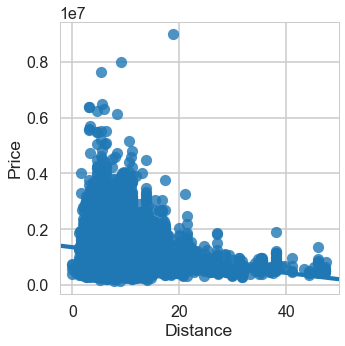

In [227]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=data2['Distance'], y=data2['Price'])
plt.show()

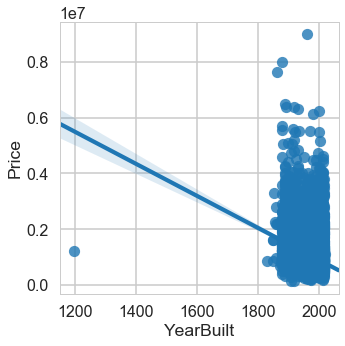

In [228]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=data2['YearBuilt'], y=data2['Price'])
plt.show()

2. Apply the model for prediction with holdout and cross validation

In [229]:
x_train =data2[['Rooms','Bathroom','BuildingArea','Car','Longtitude','Distance','YearBuilt','Lattitude']]

In [230]:
y_train = data2["Price"]

In [231]:
LinearReg = linear_model.LinearRegression()

In [232]:
# Sử dụng split dữ liệu (train trên 80% dữ liệu, 20% còn lại làm dữ liệu test)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=4)

In [233]:
#Bắt đầu chạy chạy hồi quy tuyến tín (LinearRegression)
model = LinearReg.fit(x_train,y_train)

In [234]:
LinearReg.coef_

array([  163527.01424388,   229005.21414903,     1861.93627651,
          59809.20330727,   786562.33923714,   -33445.47077616,
          -4941.97512048, -1204778.13570053])

In [235]:
#Ket qua du doan tren tap test
KetQuaDuDoan=LinearReg.predict(x_test)

In [237]:
#Sai so trung binh tren tap test
MeanValue = np.mean((KetQuaDuDoan-y_test)**2)
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSEValue = sqrt(((KetQuaDuDoan-y_test)**2).mean())
print(MeanValue)
print(RMSEValue)

162647012903.1862
403295.19325574185


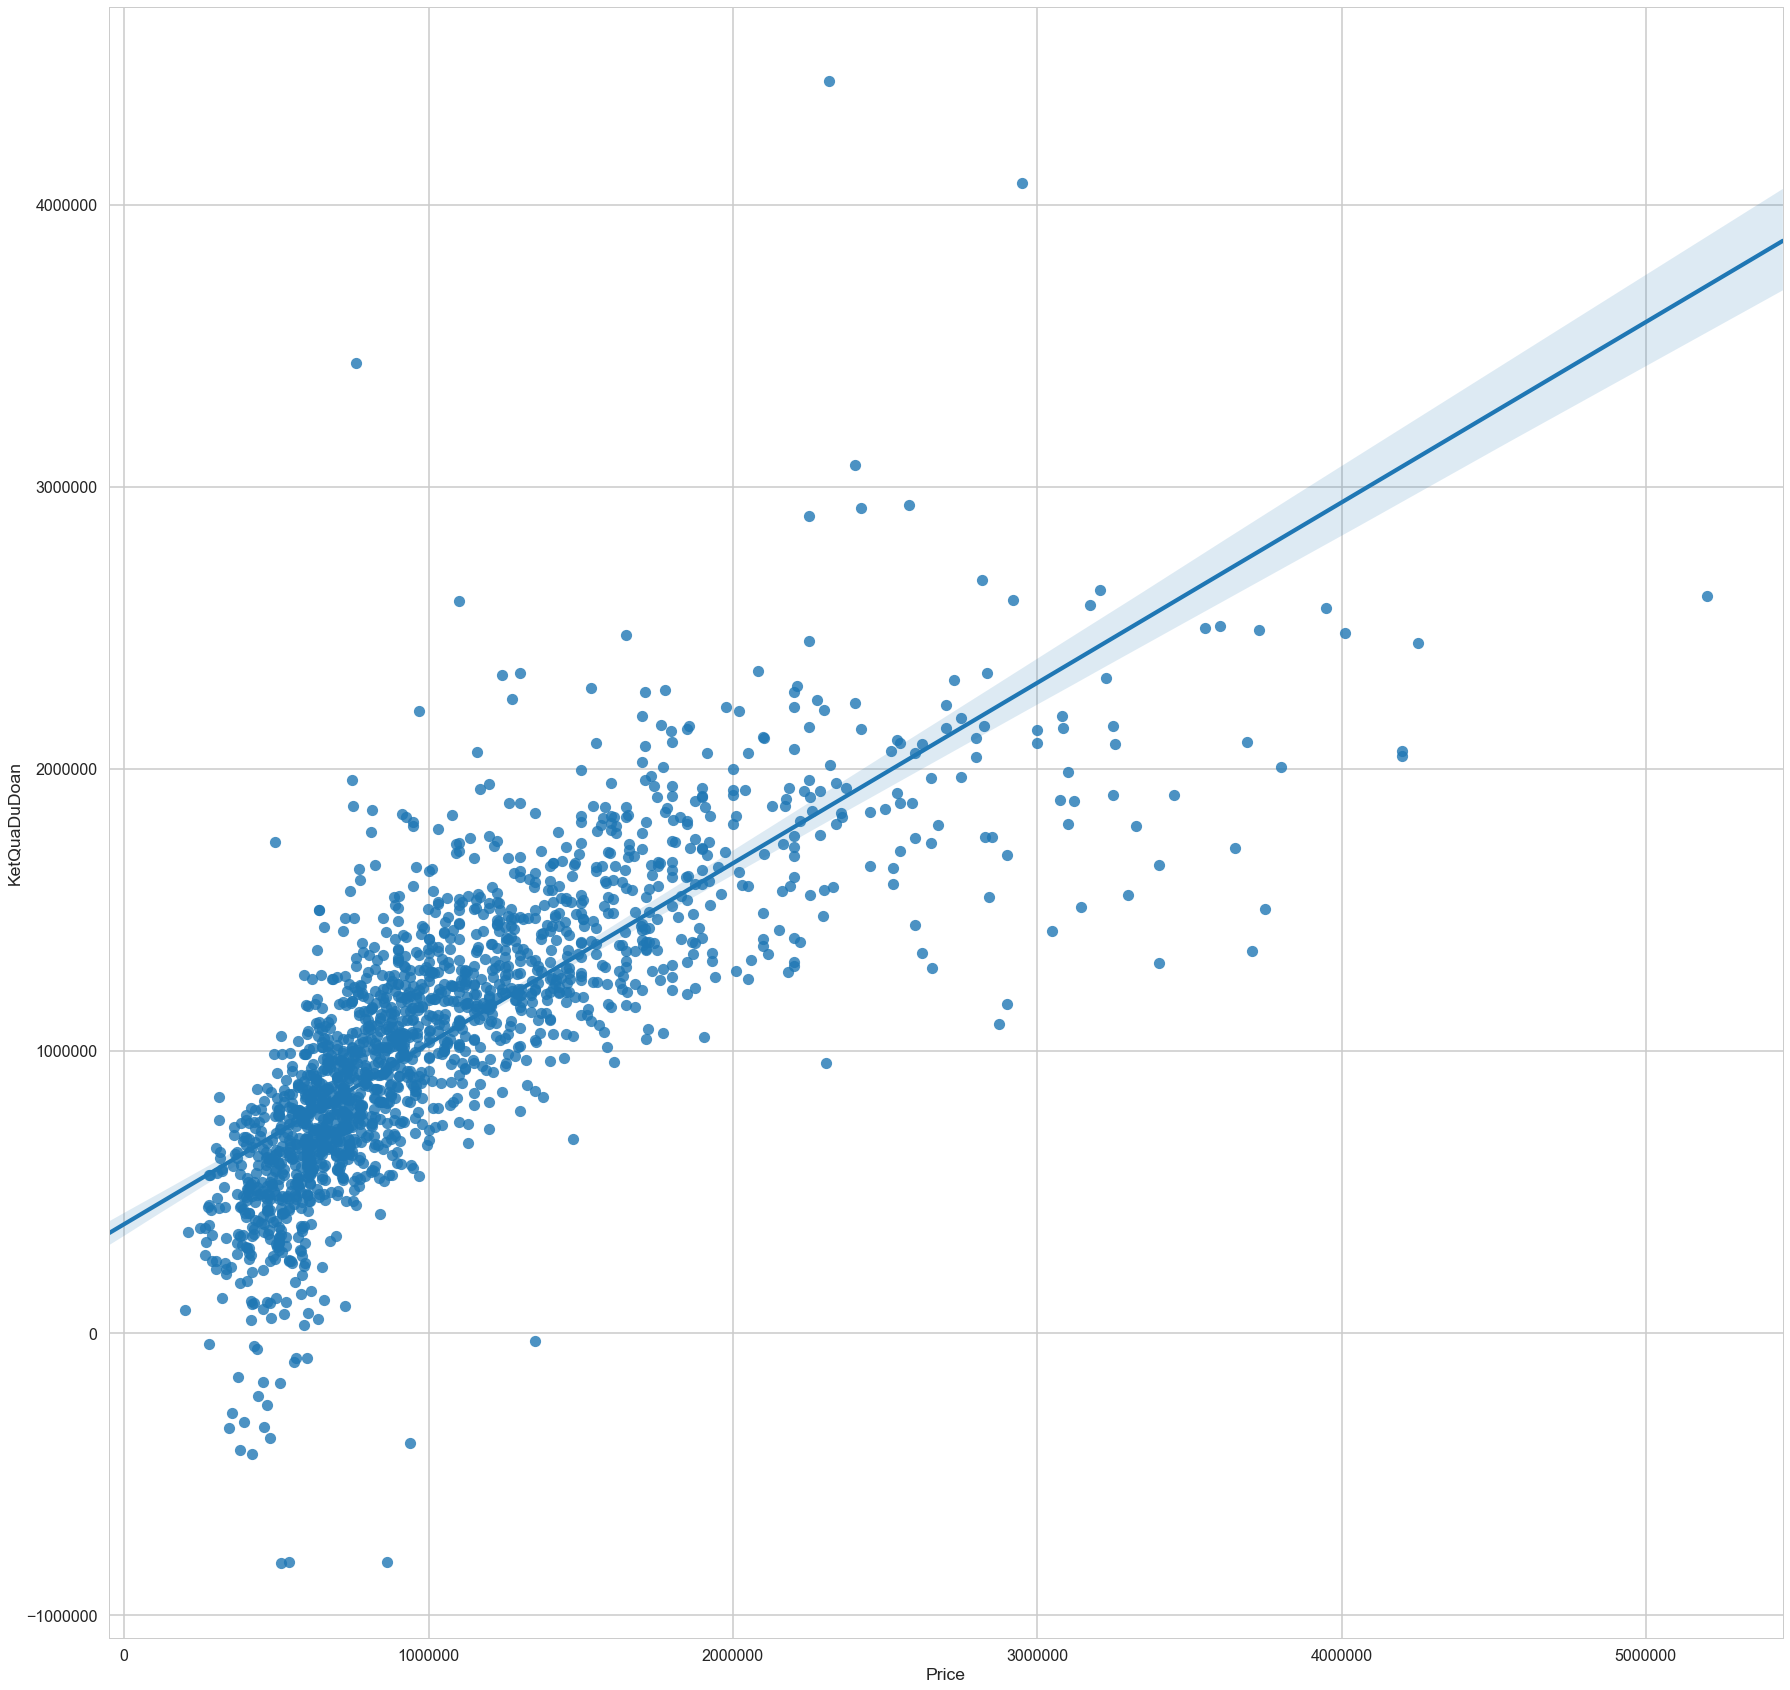

In [239]:
sns.regplot(y_test, KetQuaDuDoan)
plt.xlabel("Price")
plt.ylabel("KetQuaDuDoan")
plt.show()

In [ ]:
score=model.score(x_test, y_test)
print(score)

In [ ]:
# Sử dụng cross_validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
scores = cross_val_score(LinearReg, x_train, y_train, cv=6)
print(scores)

In [ ]:
# sau khi sử dụng cross_validation mô hình đã được điều chỉnh từ 0.28 đến 0.35

In [ ]:
KetQuaDuDoan_2 = cross_val_predict(LinearReg, x_test, y_test, cv=6)
plt.scatter(y_test, KetQuaDuDoan_2)
plt.show()

In [240]:
#Sai so trung binh tren tap test
MeanValue2 = np.mean((KetQuaDuDoan_2-y_test)**2)
RMSEValue2 = sqrt(((KetQuaDuDoan_2-y_test)**2).mean())
print(MeanValue2)
print(RMSEValue2)

282621603150.2229
531621.6729500622
